In [3]:
from pyecharts import options as opts
import pandas as pd
import numpy as np 
from pyecharts.charts import Bar,Pie
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('F:\jupyter notebook/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#删除缺失值
data.dropna(inplace = True)
data.reset_index(drop=True,inplace = True)
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [8]:
#五数概括
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


In [10]:
#对象类型的数据
data.describe(include='object').T

,count,unique,top,freq
Name,16291,11325,Need for Speed: Most Wanted,12
Platform,16291,31,DS,2131
Genre,16291,12,Action,3251
Publisher,16291,576,Electronic Arts,1339


In [11]:
#从游戏类型方面
data['Year'] = data['Year'].astype(str)
x_first_5 = data[((data['Year'] == '2020.0')|(data['Year'] == '2019.0')|(data['Year']=='2018.0')|(data['Year']=='2017.0')|(data['Year']=='2016.0'))]
x_next_5 = data[((data['Year'] == '2015.0')|(data['Year'] == '2014.0')|(data['Year']=='2013.0')|(data['Year']=='2012.0')|(data['Year']=='2011.0'))]

In [13]:
bar1 = Bar(init_opts=opts.InitOpts(width='1450px', height='350px'))
bar1.add_xaxis(x_next_5['Genre'].value_counts().index.tolist())
bar1.add_yaxis("",x_next_5['Genre'].value_counts().tolist())
bar1.set_global_opts(title_opts=opts.TitleOpts(title="2011-2015年用户喜欢的游戏类型"),
                     visualmap_opts=opts.VisualMapOpts(max_=100),
                    ) 
bar1.render_notebook()

In [14]:
bar2 = Bar(init_opts=opts.InitOpts(width='1350px', height='350px'))
bar2.add_xaxis(x_first_5['Genre'].value_counts().index.tolist())
bar2.add_yaxis("",x_first_5['Genre'].value_counts().tolist())
bar2.set_global_opts(title_opts=opts.TitleOpts(title="2015-2020年用户喜欢的类型"),
                     visualmap_opts=opts.VisualMapOpts(max_=100),
                    ) 
bar2.render_notebook()

In [16]:
#游戏平台用户量
bar1 = Bar(init_opts=opts.InitOpts(width='1450px', height='350px'))
bar1.add_xaxis(x_next_5['Platform'].value_counts().index.tolist())
bar1.add_yaxis("",x_next_5['Platform'].value_counts().tolist())
bar1.set_global_opts(title_opts=opts.TitleOpts(title="2011-2015年游戏平台用户量"),
                     visualmap_opts=opts.VisualMapOpts(max_=100),
                    ) 
bar1.render_notebook()

In [19]:
bar1 = Bar(init_opts=opts.InitOpts(width='1450px', height='350px'))
bar1.add_xaxis(x_first_5['Platform'].value_counts().index.tolist())
bar1.add_yaxis("",x_first_5['Platform'].value_counts().tolist())
bar1.set_global_opts(title_opts=opts.TitleOpts(title="2015-2020年游戏平台用户量"),
                     visualmap_opts=opts.VisualMapOpts(max_=100),
                    ) 
bar1.render_notebook()

In [20]:
#发行商
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='550px'))
pie1.add('', [list(z) for z in zip(x_next_5['Publisher'].value_counts().head(10).index.tolist(), x_next_5['Publisher'].value_counts().head(10).tolist())], radius=['35%', '60%'])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='2011-2015全球前十发行商'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.render_notebook()

In [21]:
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='550px'))
pie1.add('', [list(z) for z in zip(x_first_5['Publisher'].value_counts().head(10).index.tolist(), x_first_5['Publisher'].value_counts().head(10).tolist())], radius=['35%', '60%'])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='2015-2020全球前十发行商'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.render_notebook()


Text(0, 0.5, '/million')

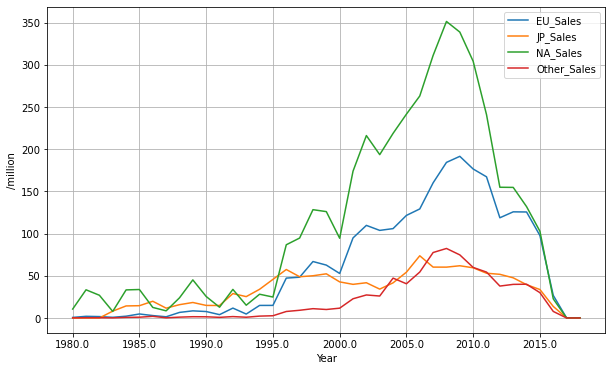

In [22]:
#不同地区销售额变化趋势
data.pivot_table(index ='Year',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],aggfunc='sum').plot(figsize=(10,6))
plt.grid()
plt.ylabel('/million')


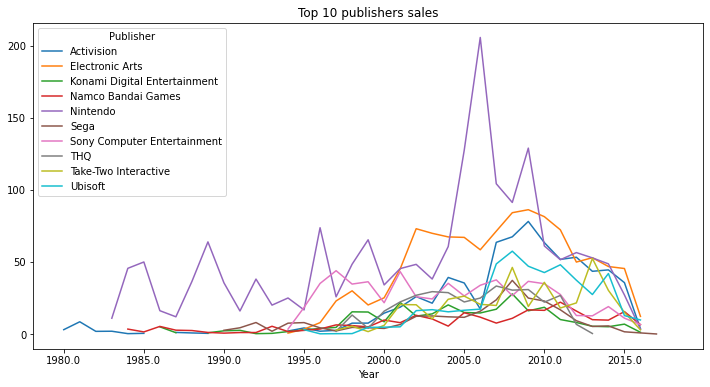

In [24]:
#不同发行商的销售趋势
Publisher_10 = data['Publisher'].value_counts().head(10).index.tolist()
data_Publisher_10=data[data['Publisher'].isin(Publisher_10)]
data_Publisher_10_S=pd.pivot_table(data=data_Publisher_10,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
data_Publisher_10_S.plot(title='Top 10 publishers sales',figsize=(12,6))

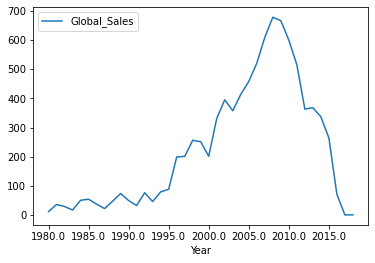

In [33]:
#数据预测
data_year=data[['Year', 'Global_Sales']].groupby('Year').sum().sort_values(by='Year')
data_year.plot()


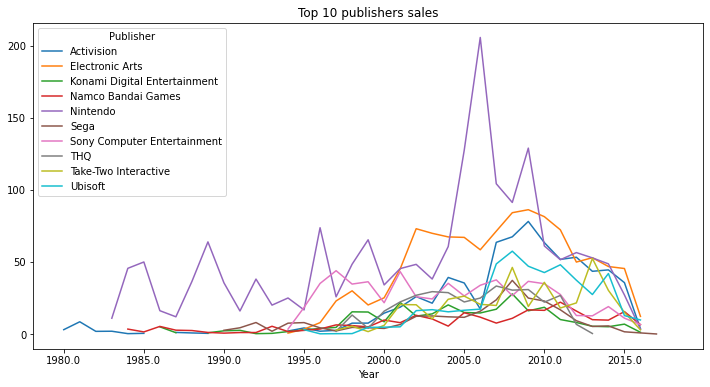

In [38]:
#可视化应用
data_Publisher_10=data[data['Publisher'].isin(Publisher_10)]
data_Publisher_10_S=pd.pivot_table(data=data_Publisher_10,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
data_Publisher_10_S.plot(title='Top 10 publishers sales',figsize=(12,6))

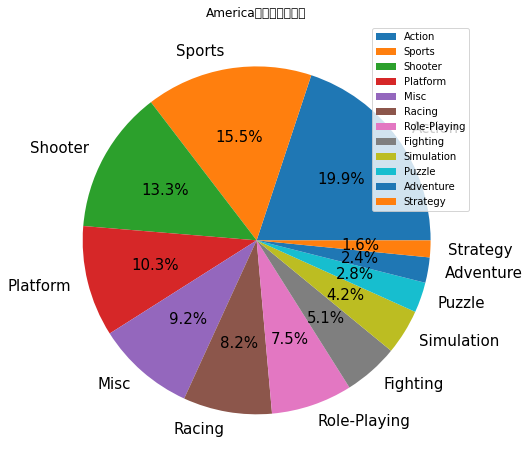

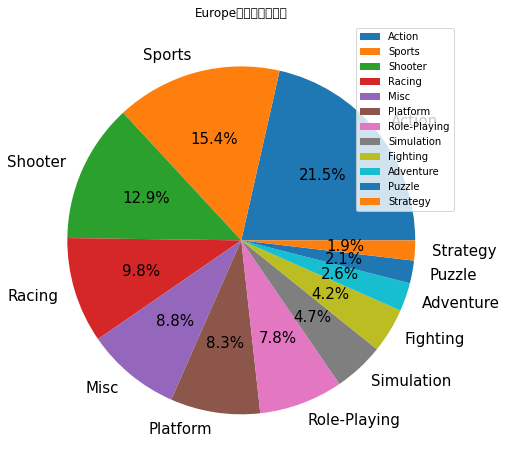

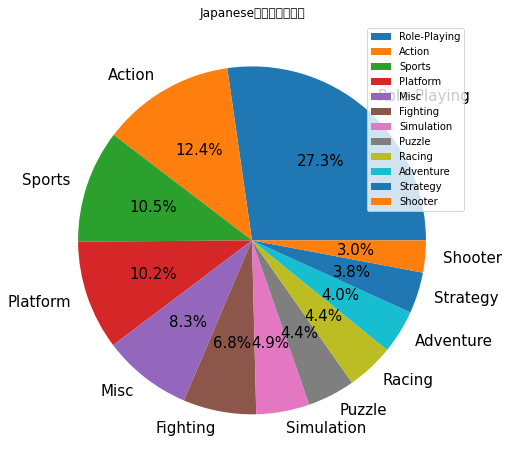

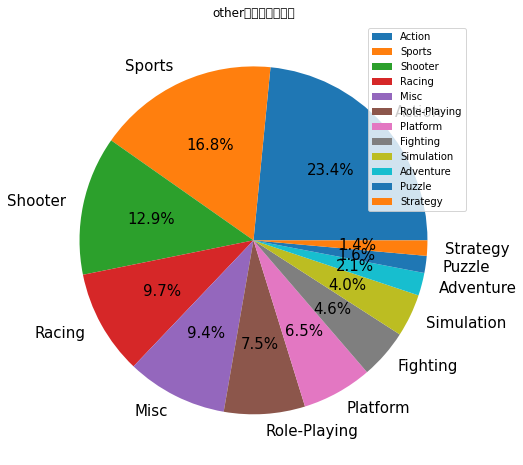

In [41]:
for region_name, region in [('America', 'NA_Sales'), ('Europe', 'EU_Sales'), ('Japanese', 'JP_Sales'), ('other', 'Other_Sales')]:
    data_region = data[['Genre', region]].groupby('Genre').sum().sort_values(by=region, ascending=False)
    data_region.plot.pie(y=region, autopct='%0.1f%%', title=region_name+'地区销售额占比', figsize=(8, 8), fontsize=15)
    plt.ylabel('')
    plt.show()